# Text Preprocessing with Keras

In [3]:
!pip install tensor-sensor

  Created wheel for tensor-sensor: filename=tensor_sensor-0.1.3-py3-none-any.whl size=25214 sha256=6eb34975f5455c9f09239cd1463171f8a0600dc5d8e77ed235019d5d96aa5816
  Stored in directory: /home/rishav/.cache/pip/wheels/67/ee/06/11b26037113c198f6a34555063a2051d277f68ee357d29678b
Successfully built tensor-sensor


In [5]:
# importing libraries

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D
import tsensor
import numpy as np

## Tokenization

In [6]:
# Tokenising sentences
sentences = [
    'The quick brown fox jumps over the lazy dog.'
]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [7]:
tokenizer.word_index

{'the': 1,
 'quick': 2,
 'brown': 3,
 'fox': 4,
 'jumps': 5,
 'over': 6,
 'lazy': 7,
 'dog': 8}

In [8]:
train_sequence = tokenizer.texts_to_sequences(sentences)
train_sequence = np.array(train_sequence)
print(train_sequence)

[[1 2 3 4 5 6 1 7 8]]


## Creating Embedding Layer

In [9]:
# Create a random embedding layer

embedding = Embedding(input_dim=len(train_sequence[0]), output_dim=128)

In [10]:
# Get the embeddings of the train sample

train_sample = embedding(train_sequence)

In [11]:
train_sequence.shape

(1, 9)

In [12]:
train_sample.shape

TensorShape([1, 9, 128])

findfont: Font family ['Hack'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Hack'] not found. Falling back to DejaVu Sans.


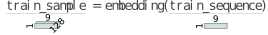

In [13]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    train_sample = embedding(train_sequence)

In [14]:
train_sample[0]

<tf.Tensor: shape=(9, 128), dtype=float32, numpy=
array([[ 0.02993647,  0.03938203, -0.02831069, ...,  0.04809493,
         0.00650773, -0.00591278],
       [ 0.04712255, -0.04178181,  0.02635225, ..., -0.03044199,
        -0.00743293, -0.03231887],
       [ 0.00878092, -0.0334985 , -0.03632308, ..., -0.00147568,
        -0.03197782,  0.00841673],
       ...,
       [ 0.02993647,  0.03938203, -0.02831069, ...,  0.04809493,
         0.00650773, -0.00591278],
       [-0.00479114,  0.01385826,  0.03359063, ...,  0.0243106 ,
         0.0024485 , -0.00019177],
       [-0.02660768, -0.04620935,  0.01796501, ..., -0.00426642,
         0.01213487,  0.00685295]], dtype=float32)>

## Averaging across tokens

In [15]:
GlobalAveragePooling1D()(train_sample)

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[ 8.78745504e-03, -6.34485530e-03,  3.99833359e-03,
         7.69904582e-03,  1.08370055e-02, -1.93243231e-05,
        -2.13800580e-03, -3.01145669e-03,  1.41481739e-02,
         1.53586399e-02, -5.80017339e-04, -7.59381801e-04,
         9.19266511e-03,  1.61014777e-02, -1.08278892e-03,
         1.34343272e-02,  4.54773923e-04, -9.24400147e-03,
        -6.68917689e-03, -4.44073416e-03, -1.16268452e-02,
        -7.35858409e-03,  1.04924599e-02,  2.98703345e-03,
         1.45396842e-02,  1.50795598e-02,  2.72605289e-03,
         6.21146057e-03,  1.87095478e-02,  3.25278589e-03,
        -9.62125976e-03, -7.68676400e-04, -1.58575401e-02,
        -1.59156118e-02,  1.39894872e-03, -1.56217469e-02,
         2.73014535e-04,  2.71443068e-03, -1.05826641e-02,
        -6.74987398e-03,  7.36674760e-03,  5.93404518e-03,
        -7.53757264e-03,  1.38794421e-03,  1.18687004e-02,
         4.65201959e-03,  8.27259943e-03,  2.56008655e-03,
      

![](images/Emb6.png)

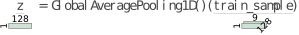

In [16]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    z = GlobalAveragePooling1D()(train_sample)

## Creating Word Embeddings for more than one sentence

In [17]:
# More than one sentence

test_corpus = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick brown fox.',
    'The lazy dog.',
    'The dog.',
    'Dog and the fox.',
    'Hello, world!'
]
encoded_sentences = tokenizer.texts_to_sequences(test_corpus)
for sentence, encoded_sentence in zip(test_corpus, encoded_sentences):
    print(sentence, encoded_sentence)

The quick brown fox jumps over the lazy dog. [1, 2, 3, 4, 5, 6, 1, 7, 8]
The quick brown fox. [1, 2, 3, 4]
The lazy dog. [1, 7, 8]
The dog. [1, 8]
Dog and the fox. [8, 1, 4]
Hello, world! []


## Padding Sequences

In [18]:
# Length of each sentence in the corpus

[len(sentence) for sentence in encoded_sentences]

[9, 4, 3, 2, 3, 0]

In [19]:
# Length of the longest sentence

max([len(sentence) for sentence in encoded_sentences])

9

In [20]:
MAX_SEQUENCE_LENGTH = 9

In [21]:
# Padding sequences that are shorter than the longest sequence

X = pad_sequences(encoded_sentences, maxlen=MAX_SEQUENCE_LENGTH)
X

array([[1, 2, 3, 4, 5, 6, 1, 7, 8],
       [0, 0, 0, 0, 0, 1, 2, 3, 4],
       [0, 0, 0, 0, 0, 0, 1, 7, 8],
       [0, 0, 0, 0, 0, 0, 0, 1, 8],
       [0, 0, 0, 0, 0, 0, 8, 1, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

## Embedding Layer

In [22]:
# Training data with more than 1 sentences

X.shape

(6, 9)

In [23]:
# Embeddings of the larger corpus

X_embedded = embedding(X)

In [24]:
X_embedded.shape

TensorShape([6, 9, 128])

In [25]:
X_embedded

<tf.Tensor: shape=(6, 9, 128), dtype=float32, numpy=
array([[[ 0.02993647,  0.03938203, -0.02831069, ...,  0.04809493,
          0.00650773, -0.00591278],
        [ 0.04712255, -0.04178181,  0.02635225, ..., -0.03044199,
         -0.00743293, -0.03231887],
        [ 0.00878092, -0.0334985 , -0.03632308, ..., -0.00147568,
         -0.03197782,  0.00841673],
        ...,
        [ 0.02993647,  0.03938203, -0.02831069, ...,  0.04809493,
          0.00650773, -0.00591278],
        [-0.00479114,  0.01385826,  0.03359063, ...,  0.0243106 ,
          0.0024485 , -0.00019177],
        [-0.02660768, -0.04620935,  0.01796501, ..., -0.00426642,
          0.01213487,  0.00685295]],

       [[-0.04460035,  0.03902503, -0.0375099 , ...,  0.02543092,
          0.02689406, -0.00956897],
        [-0.04460035,  0.03902503, -0.0375099 , ...,  0.02543092,
          0.02689406, -0.00956897],
        [-0.04460035,  0.03902503, -0.0375099 , ...,  0.02543092,
          0.02689406, -0.00956897],
        ...,
 

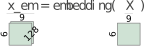

In [26]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    x_em = embedding(X)

In [27]:
X.shape

(6, 9)

In [28]:
x_em.shape

TensorShape([6, 9, 128])

## Averaging across tokens

![](images/Emb6.png)

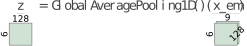

In [29]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    z = GlobalAveragePooling1D()(x_em)

In [30]:
z.shape

TensorShape([6, 128])